In [ ]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def gradient1D(D, nxsteps, length, rateProd, tf):
    '''
    Simulating the 1-D Diffusion equation by the Finite Difference Method
    Numerical scheme used is a first order upwind in time
    and a second order central difference in space (Explicit Method)
    '''
    # Choice of N
    N = nxsteps  # Added this line to define N
    if N%(2*length) != 0 or N < length:
        raise Exception('N should be at least 2 times that of length and 2*length/N should give remainder zero.')

    # Total number of sublattices
    nx = nxsteps + 1
    print(nx)

    # Width of a sublattice on each axis (units: {\mu}m)
    dx = 2*length/(nx-1)
    print(dx)

    # Length of a single time step (units: s)
    dt = (0.25*(dx)**2)/(D*(dx**4))
    print(dt)

    # Total number of time steps
    nt = 1 + int(tf/dt)
    print(nt)

    # Stability criterion
    beta = D*dt/(dx**2)
    print('beta = {}'.format(beta))

    # Divide up the entire volume into sublattices
    x = np.linspace(-length, length, nx)
    print(x)

    # Preallocating concentrations c
    c = np.zeros((nx))
    cn = np.zeros((nx))
    print('shape = {}'.format(c.shape))
    print('c = {}'.format(c))

    # Calculating the area (units = {\mu}m^2)
    area = 6*dx**2
    print(area)

    # Calculating the flux (units = {\mu}m^2s)
    J = float(rateProd)/area
    print(J)

    # Neumann condition for constant flux source ==> dc/dn = J
    CnW=J # at x=0 flowing west
    CnE=J # at x=0 flowing east

    # Numerical integration to calculate concentrations
    for it in range(0,nt+1): #nt+1
        cn = c

        # Explicit method
        cn[1:nx-1]=c[1:nx-1]+(D*dt*(c[2:nx]-2*c[1:nx-1]+c[0:nx-2])/(dx*dx))

        # Including constant flux source
        center = int((nx-1)/2)
        c[center] = c[center-1] + CnW*float(dx)
        c[center] = c[center+1] + CnE*float(dx)

    return (c,nx,dx)

# Parameters
D = 320.0
length = 52
rateProd = 865.0
tf = 1.0
N = 104
nxsteps = N

# Run the simulation
cx = gradient1D(D, nxsteps, length, rateProd, tf)

105
1.0
0.00078125
1281
beta = 0.25
[-52. -51. -50. -49. -48. -47. -46. -45. -44. -43. -42. -41. -40. -39.
 -38. -37. -36. -35. -34. -33. -32. -31. -30. -29. -28. -27. -26. -25.
 -24. -23. -22. -21. -20. -19. -18. -17. -16. -15. -14. -13. -12. -11.
 -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.
  46.  47.  48.  49.  50.  51.  52.]
shape = (105,)
c = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6.0
144.16666666666666


[-104. -102. -100.  -98.  -96.  -94.  -92.  -90.  -88.  -86.  -84.  -82.
  -80.  -78.  -76.  -74.  -72.  -70.  -68.  -66.  -64.  -62.  -60.  -58.
  -56.  -54.  -52.  -50.  -48.  -46.  -44.  -42.  -40.  -38.  -36.  -34.
  -32.  -30.  -28.  -26.  -24.  -22.  -20.  -18.  -16.  -14.  -12.  -10.
   -8.   -6.   -4.   -2.    0.    2.    4.    6.    8.   10.   12.   14.
   16.   18.   20.   22.   24.   26.   28.   30.   32.   34.   36.   38.
   40.   42.   44.   46.   48.   50.   52.   54.   56.   58.   60.   62.
   64.   66.   68.   70.   72.   74.   76.   78.   80.   82.   84.   86.
   88.   90.   92.   94.   96.   98.  100.  102.  104.]


Text(0.5, 1.0, 'Concentration gradient')

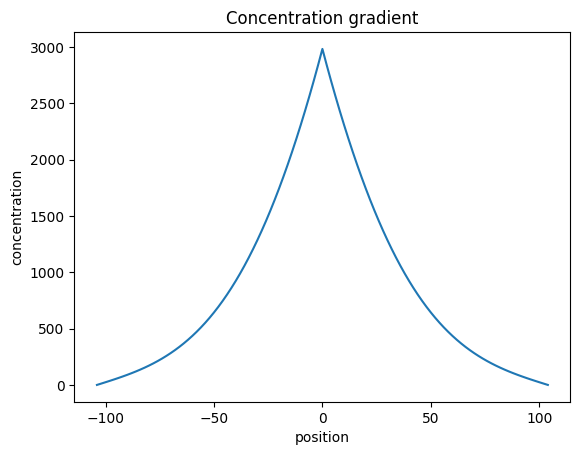

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
c = cx[0]
nx = cx[1]
x = np.linspace(-length*2, length*2, nx)
print(x)
plt.plot(x,c)
plt.xlabel('position')
plt.ylabel('concentration')
plt.title('Concentration gradient')

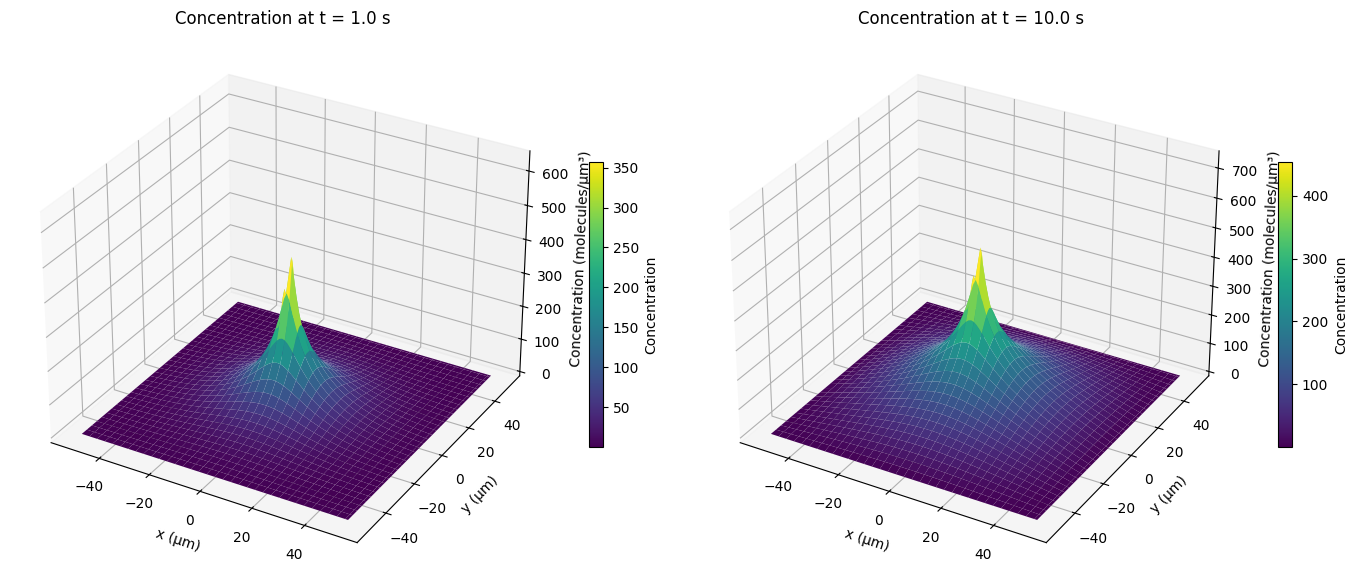

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def simulate_2d_diffusion(D, nxsteps, length, rateProd, tf1, tf2):
    """
    Simulate 2D diffusion with a constant flux source at the center.
    Returns concentration fields at two times (tf1 and tf2).
    """
    # Grid setup
    nx = ny = nxsteps + 1  # Number of grid points
    dx = dy = 2 * length / nxsteps  # Grid spacing
    x = np.linspace(-length, length, nx)
    y = np.linspace(-length, length, ny)
    X, Y = np.meshgrid(x, y)

    # Stability condition: dt < dx²/(4D)
    dt = 0.1 * (dx ** 2) / (4 * D)
    nt1 = 1 + int(tf1 / dt)
    nt2 = 1 + int(tf2 / dt)

    # Initialize concentration
    c = np.zeros((nx, ny))

    # Flux condition (source at center)
    J = rateProd / (dx * dy)  # Flux in molecules/(µm²·s)
    center = nx // 2  # Center index

    # Time-stepping for tf1
    for _ in range(nt1):
        cn = c.copy()
        # Update interior points using 2D finite differences
        c[1:-1, 1:-1] = cn[1:-1, 1:-1] + (D * dt / dx**2) * (
            cn[2:, 1:-1] + cn[:-2, 1:-1] + cn[1:-1, 2:] + cn[1:-1, :-2] - 4 * cn[1:-1, 1:-1]
        )
        # Apply flux source at center (Neumann condition)
        c[center, center] = (c[center-1, center] + c[center+1, center] +
                            c[center, center-1] + c[center, center+1] + J * dx) / 4

    c_tf1 = c.copy()

    # Continue time-stepping to tf2
    for _ in range(nt2 - nt1):
        cn = c.copy()
        c[1:-1, 1:-1] = cn[1:-1, 1:-1] + (D * dt / dx**2) * (
            cn[2:, 1:-1] + cn[:-2, 1:-1] + cn[1:-1, 2:] + cn[1:-1, :-2] - 4 * cn[1:-1, 1:-1]
        )
        c[center, center] = (c[center-1, center] + c[center+1, center] +
                            c[center, center-1] + c[center, center+1] + J * dx) / 4

    return X, Y, c_tf1, c

# Parameters
D = 320.0       # Diffusion coefficient (µm²/s)
length = 52     # Half-length of domain (µm)
rateProd = 865  # Production rate (molecules/s)
nxsteps = 100   # Spatial resolution

# Observation times
tf1 = 1.0       # Early time (s)
tf2 = 10.0      # Later time (s)

# Run simulation
X, Y, c1, c2 = simulate_2d_diffusion(D, nxsteps, length, rateProd, tf1, tf2)

# Plotting
fig = plt.figure(figsize=(14, 6))

# Plot at t = tf1
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, c1, cmap=cm.viridis, edgecolor='none')
ax1.set_title(f'Concentration at t = {tf1} s')
ax1.set_xlabel('x (µm)')
ax1.set_ylabel('y (µm)')
ax1.set_zlabel('Concentration (molecules/µm³)')
fig.colorbar(surf1, ax=ax1, shrink=0.5, label='Concentration')

# Plot at t = tf2
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, c2, cmap=cm.viridis, edgecolor='none')
ax2.set_title(f'Concentration at t = {tf2} s')
ax2.set_xlabel('x (µm)')
ax2.set_ylabel('y (µm)')
ax2.set_zlabel('Concentration (molecules/µm³)')
fig.colorbar(surf2, ax=ax2, shrink=0.5, label='Concentration')

plt.tight_layout()
plt.show()

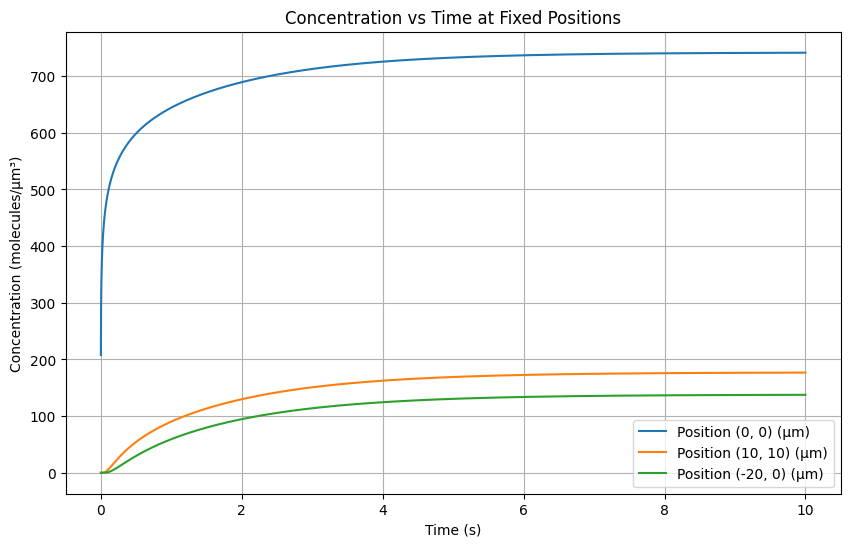

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def simulate_2d_diffusion_with_time_tracking(D, nxsteps, length, rateProd, total_time, observe_positions):
    """
    Simulate 2D diffusion while tracking concentration over time at fixed positions.

    Args:
        observe_positions: List of (x, y) tuples to monitor (e.g., [(0, 0), (10, 10)]).
    Returns:
        t_values: Time points
        c_history: Dictionary of concentration vs. time for each position
    """
    # Grid setup
    nx = ny = nxsteps + 1
    dx = dy = 2 * length / nxsteps
    x = np.linspace(-length, length, nx)
    y = np.linspace(-length, length, ny)
    X, Y = np.meshgrid(x, y)

    # Time stepping
    dt = 0.1 * (dx**2) / (4 * D)  # Stability condition
    nt = int(total_time / dt)

    # Initialize concentration and history tracking
    c = np.zeros((nx, ny))
    c_history = {pos: [] for pos in observe_positions}
    t_values = np.linspace(0, total_time, nt + 1)

    # Flux source
    J = rateProd / (dx * dy)
    center = nx // 2

    # Convert (x,y) positions to grid indices
    pos_indices = {}
    for pos in observe_positions:
        x_idx = np.argmin(np.abs(x - pos[0]))
        y_idx = np.argmin(np.abs(y - pos[1]))
        pos_indices[pos] = (x_idx, y_idx)

    # Time-stepping loop
    for step in range(nt + 1):
        cn = c.copy()

        # Update interior points
        c[1:-1, 1:-1] = cn[1:-1, 1:-1] + (D * dt / dx**2) * (
            cn[2:, 1:-1] + cn[:-2, 1:-1] + cn[1:-1, 2:] + cn[1:-1, :-2] - 4 * cn[1:-1, 1:-1]
        )

        # Apply flux source at center
        c[center, center] = (c[center-1, center] + c[center+1, center] +
                            c[center, center-1] + c[center, center+1] + J * dx) / 4

        # Record concentration at observed positions
        for pos in observe_positions:
            x_idx, y_idx = pos_indices[pos]
            c_history[pos].append(c[x_idx, y_idx])

    return t_values, c_history

# Parameters
D = 320.0
length = 52
rateProd = 865
nxsteps = 100
total_time = 10.0  # Simulation duration (s)

# Positions to monitor (e.g., source and a point 10µm away)
observe_positions = [(0, 0), (10, 10), (-20, 0)]

# Run simulation
t_values, c_history = simulate_2d_diffusion_with_time_tracking(
    D, nxsteps, length, rateProd, total_time, observe_positions
)

# Plotting
plt.figure(figsize=(10, 6))
for pos in observe_positions:
    plt.plot(t_values, c_history[pos], label=f'Position {pos} (µm)')

plt.xlabel('Time (s)')
plt.ylabel('Concentration (molecules/µm³)')
plt.title('Concentration vs Time at Fixed Positions')
plt.legend()
plt.grid(True)
plt.show()

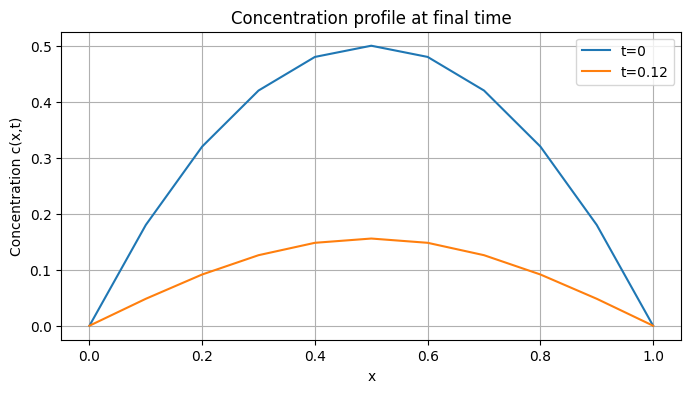

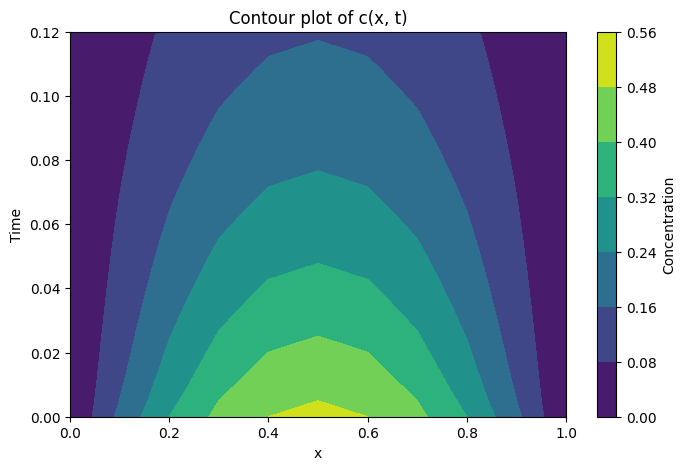

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1.0
L = 1.0
N = 11  # Number of spatial points
dx = L / (N - 1)
x = np.linspace(0, L, N)

# Time parameters
timesteps = 30
s = 0.4  # Stability factor <= 0.5
dt = s * dx**2 / D
t = np.linspace(0, dt * timesteps, timesteps + 1)

# Initial condition
c = np.zeros((timesteps + 1, N))  # c[time, space]
c[0, :] = 2 * (x / L) * (1 - x / L)  # f(x)
c[:, 0] = 0  # Boundary condition at x=0
c[:, -1] = 0  # Boundary condition at x=L

# FTCS Time-stepping
for n in range(timesteps):
    for i in range(1, N - 1):
        c[n+1, i] = c[n, i] + s * (c[n, i+1] - 2 * c[n, i] + c[n, i-1])

# Plot c(x, tf)
plt.figure(figsize=(8, 4))
plt.plot(x, c[0, :], label='t=0')
plt.plot(x, c[-1, :], label=f't={timesteps*dt:.2f}')
plt.xlabel('x')
plt.ylabel('Concentration c(x,t)')
plt.title('Concentration profile at final time')
plt.legend()
plt.grid(True)
plt.show()

# 2D Contour plot
X, T = np.meshgrid(x, t)
plt.figure(figsize=(8, 5))
cp = plt.contourf(X, T, c, cmap='viridis')
plt.colorbar(cp, label='Concentration')
plt.xlabel('x')
plt.ylabel('Time')
plt.title('Contour plot of c(x, t)')
plt.show()


In [ ]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

def gradient1D(D, nxsteps, length, rateProd, tf):
    '''
    Simulating the 1-D Diffusion equation by the Finite Difference Method
    Numerical scheme used is a first order upwind in time
    and a second order central difference in space (Explicit Method)
    '''
    # Total number of sublattices
    nx = nxsteps + 1
    print(nx)

    # Width of a sublattice on each axis (units: μm)
    dx = 2 * length / (nx - 1)
    print(dx)

    # Length of a single time step (units: s)
    dt = (0.25 * (dx)**2) / (D * (dx**4))
    print(dt)

    # Total number of time steps
    nt = 1 + int(tf / dt)
    print(nt)

    # Stability criterion of the explicit finite difference method (0 <= beta <= 0.5)
    beta = D * dt / (dx**2)
    print('beta = {}'.format(beta))

    # Divide up the entire volume into sublattices
    x = np.linspace(-length, length, nx)
    print(x)

    # Preallocating concentrations c
    c = np.zeros((nx))
    cn = np.zeros((nx))
    print('shape = {}'.format(c.shape))
    print('c = {}'.format(c))

    # Initial concentration at the center
    c[int((nx - 1) / 2)] = 200

    # Numerical integration to calculate concentrations in every sublattice at a certain final time, tf
    for it in range(0, nt + 1):
        cn = c
        # Explicit method
        c[1:nx - 1] = cn[1:nx - 1] + (D * dt * (cn[2:nx] - 2 * cn[1:nx - 1] + cn[0:nx - 2]) / (dx * dx))

    return (c, nx, dx)

# Parameters
D = 320.0
length = 12
rateProd = 865.0
tf = 1.0
N = 24
nxsteps = N

# Run simulation
cx = gradient1D(D, nxsteps, length, rateProd, tf)


25
1.0
0.00078125
1281
beta = 0.25
[-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]
shape = (25,)
c = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


[-12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.
   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


Text(0.5, 1.0, 'Concentration gradient')

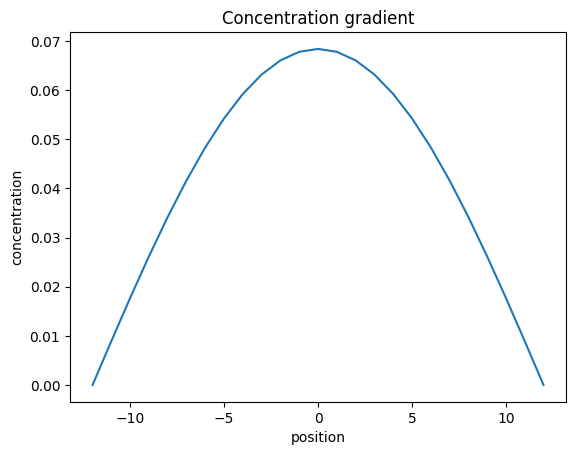

In [ ]:
# Plotting completeGradFile concentrations
import matplotlib.pyplot as plt
from matplotlib import cm
# Plotting only diagonal concentrations from (0,0,0) to (24,24,24)
c = cx[0]
nx = cx[1]
x = np.linspace(-length, length, nx)
print(x)
plt.plot(x,c)
plt.xlabel('position')
plt.ylabel('concentration')
plt.title('Concentration gradient')